In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(".."))
from portfolio.random_vs_optimized_SLSQP import *

# visualization setup
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

In [2]:
#parameters
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN"]
start = "2020-01-01"
end = "2024-12-31"
n_portfolios = 10_000

In [3]:
results = random_portfolio(tickers, start, end, n_portfolios)

returns = results[0]
volatilities = results[1]
sharpes = results[2]

[*********************100%***********************]  5 of 5 completed


In [4]:
opt_w, opt_ret, opt_vol, opt_sharpe = optimize_portfolio_slsqp(tickers, start, end)

[*********************100%***********************]  5 of 5 completed


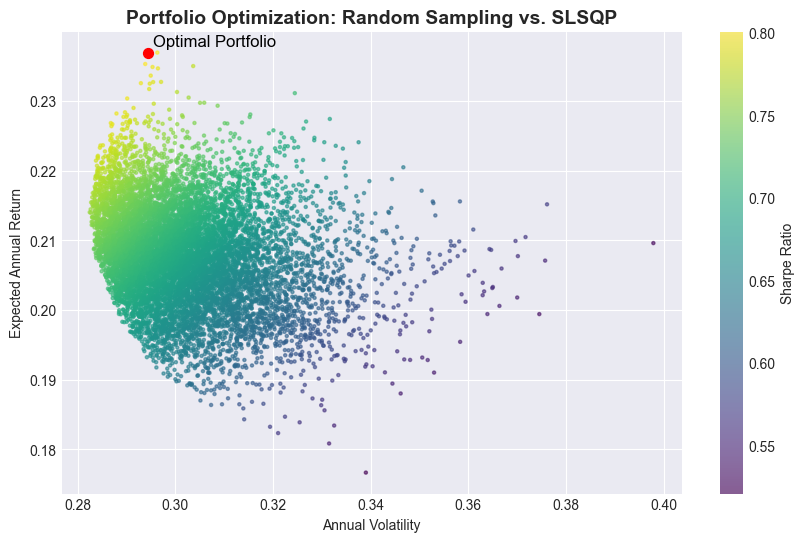

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

sc = ax.scatter(volatilities, returns, c=sharpes, cmap="viridis", s=5, alpha=0.6)
plt.colorbar(sc, label="Sharpe Ratio")

ax.scatter(opt_vol, opt_ret, color="red", marker=".", s=200)
ax.text(opt_vol + 0.001, opt_ret + 0.001, "Optimal Portfolio", fontsize=12, color='black')

ax.set_title("Portfolio Optimization: Random Sampling vs. SLSQP", fontsize=14, weight="bold")
ax.set_xlabel("Annual Volatility")
ax.set_ylabel("Expected Annual Return")

plt.show()

In [6]:
weights_df = pd.DataFrame({
    "Ticker": tickers,
    "Weight": np.round(opt_w, 4)
}).sort_values("Weight", ascending=False).reset_index(drop=True)

weights_df

,Ticker,Weight
0,AAPL,0.7126
1,GOOGL,0.2040
2,AMZN,0.0834
3,MSFT,0.0000
4,META,0.0000
